# Assignment 5 (class)
## (100 points)

__(Instruction)__ The purpose of this assignment is to practice creating Class objects to improve the structure and readibility of your code.

Due date: April 7th, 2022, 11:59pm. Points will be taken off for later homework according to 10% per day.

We discussed the following codes in class to read a list of seismograms using class objects. In this problem, you will need to add more functions to the `seismogram` class.

In [1]:
#define a class object name seismogram
class seismogram:
#the initial function will read the seismic data and save important information to attributes
    def __init__(self,filename):
        
        self.filename=filename
        fp=open(self.filename,"r")
        lines=fp.readlines()
        fp.close()   
        
        temp=lines[0].split()
        self.freq=float(temp[0])
        
        f=float(temp[0])
        
        temp=lines[6].split()
        self.lat=float(temp[1])
        self.lon=float(temp[2])
        
        temp=lines[10].split()
        self.distance=float(temp[3])
        
        temp=lines[14].split()
        self.year=int(temp[0])
        self.day=int(temp[1])
        self.starttime=int(temp[2])*3600+int(temp[3])*60+int(temp[4])
        
        temp=lines[22].split()
        self.staname=temp[0]
        
        data=[]
        t=[]
        t_tmp=0
        for line in lines[30:]:
            temp=line.split()
            for i in temp:
                data += [float(i)]
                t += [t_tmp]
                t_tmp+=f
        self.data=np.array(data)
        self.t=np.array(t)

    def max_amp(self):
        self.max_amplitude = 0
        for amp in self.data:
            if abs(amp) > abs(self.max_amplitude):
                self.max_amplitude = abs(amp)
        return self.max_amplitude

    def splot(self):
        plt.plot(self.t, self.data)
        plt.xlabel('Time(s)')
        plt.ylabel('Amplitude')

    def normalize(self):
        self.data /= self.max_amplitude

    def resample(self, sample_rate):
        new_data = []
        new_time = []
        for i in range(0, len(self.data), sample_rate):
            new_data.append(self.data[i])
            new_time.append(self.t[i])
        self.data = np.array(new_data)
        self.t = np.array(new_time)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
files=glob.glob("./earthquakes/*")
#read all data
sta=[]
for f in files:
    s=seismogram(f)
    sta += [s]

(a) Write a function named 'max_amp' in the 'seismogram' class to calculate the maximum amplitude of each seismogram. Output the results by [Distance_from_earthquake,maximum_amplitude]. Note that the distance of defined in self.distance (30 points)

In [3]:
#Put your code here
dist_amp = []
for s in sta:
    dist_amp.append([s.distance, s.max_amp()])
print(dist_amp)

[[75.4649, 15122.0], [120.7173, 2939.0], [100.6284, 3683.0], [110.968, 47305.0], [150.8721, 6587.0], [45.36378, 8870.0], [136.6862, 77038.0], [72.22691, 751488.0], [156.388, 24503.0], [95.80891, 2698.0], [50.25451, 21440.0], [30.56567, 17364.0], [65.58928, 12119.0], [133.1622, 212291.0], [21.73306, 117937.0], [106.2663, 11851.0], [150.8721, 3348.0], [110.968, 43935.0], [146.4079, 18147.0], [65.58928, 15237.0], [141.327, 5415.0], [125.3471, 10149.0], [115.5459, 75002.0], [133.1622, 6165.0], [40.42395, 44401.0], [2.900372, 5258978.0], [125.3471, 5301.0], [90.36618, 8682.0], [61.76905, 56251.0], [100.6284, 7970.0], [2.900372, 6768667.0], [75.4649, 17324.0], [15.80245, 384796.0], [95.80891, 767666.0], [81.67462, 21969.0], [35.23321, 18666.0], [136.6862, 3483.0], [15.80245, 508705.0], [115.5459, 10149.0], [90.36618, 9862.0], [125.3471, 1154.0], [100.6284, 3352.0], [45.36378, 1084730.0], [120.7173, 2499.0], [106.2663, 7265.0], [35.23321, 12463.0], [100.6284, 3292.0], [72.22691, 8647.0], [61.

(b) plot the distance with maximum amplitude. Your figure should look the same as below: (10 points)


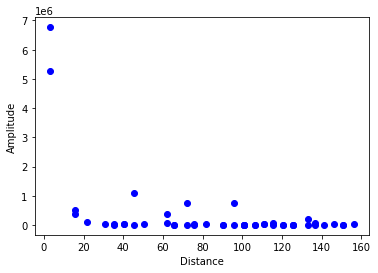

In [13]:
#Put your code here
for pair in dist_amp:
    plt.plot(pair[0], pair[1], 'bo')
plt.xlabel('Distance')
plt.ylabel('Amplitude')
plt.show()

(c) add a function name 'splot' in the seismogram class to plot the seismogram with time on the x axis and amplitude on the y axis. Make a plot for the first seismogram by running "sta[0].splot()" (20 points)

The following code needs to work after you modify the seismogram class.

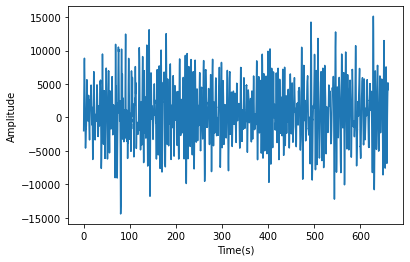

In [5]:
sta[0].splot()

(d) Write a function to normalize the amplitude of each seismogram by the maximum amplitude. The following code needs to work correctly after you modify the seismogram class (20 points)

In [6]:
for s in sta:
    s.max_amp()
    s.normalize()

(e) Make a plot for the first seismogram at station 'LVZ' after normalization, by running "sta[0].splot()" (10 points)

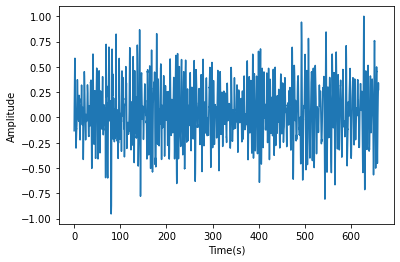

In [7]:
sta[0].splot()

(e)  (20 points)
* Write a function named 'resample' that takes one input as the sample rate to resample the time series data. For example, when I enter sta[0].resample(100), it will resample the first station data every 100 data points.
* plot the data for the first seismic station, by running 'sta[0].splot()'

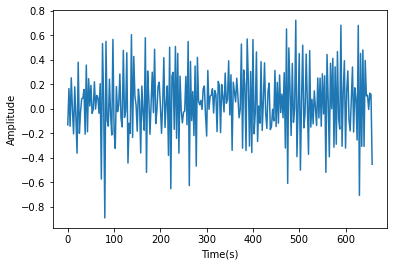

In [8]:
sta[0].resample(100)
sta[0].splot()